# Домашнее задание 2


Импортируем библиотеки:


In [3]:
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
diabetes = datasets.load_diabetes()
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

In [5]:
import requests # если библиотека отсутствует, установите через pip install

url = 'https://www4.stat.ncsu.edu/~boos/var.select/diabetes.tab.txt'

response = requests.get(url)
if response.status_code == 200:
    with open('diabetes.tab.txt', 'wb') as file:
        file.write(response.content)
    print("You downloaded diabetes :)")
else:
    print("Diabetes was NOT loaded, please do it manually")

You downloaded diabetes :)


In [6]:
# Укажите путь до файла тут
filepath = "diabetes.tab.txt"
df = pd.read_table('/home/bulat/HSE/1 course/ML/diabetes.tab.txt')
df


,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
0,59,2,32.1,101.00,157,93.2,38.0,4.00,4.8598,87,151
1,48,1,21.6,87.00,183,103.2,70.0,3.00,3.8918,69,75
2,72,2,30.5,93.00,156,93.6,41.0,4.00,4.6728,85,141
3,24,1,25.3,84.00,198,131.4,40.0,5.00,4.8903,89,206
4,50,1,23.0,101.00,192,125.4,52.0,4.00,4.2905,80,135
...,...,...,...,...,...,...,...,...,...,...,...
437,60,2,28.2,112.00,185,113.8,42.0,4.00,4.9836,93,178
438,47,2,24.9,75.00,225,166.0,42.0,5.00,4.4427,102,104
439,60,2,24.9,99.67,162,106.6,43.0,3.77,4.1271,95,132
440,36,1,30.0,95.00,201,125.2,42.0,4.79,5.1299,85,220


In [7]:
# Укажите путь до файла тут
filepath = "diabetes.tab.txt"
df = pd.read_table('/home/bulat/HSE/1 course/ML/diabetes.tab.txt')
df


,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
0,59,2,32.1,101.00,157,93.2,38.0,4.00,4.8598,87,151
1,48,1,21.6,87.00,183,103.2,70.0,3.00,3.8918,69,75
2,72,2,30.5,93.00,156,93.6,41.0,4.00,4.6728,85,141
3,24,1,25.3,84.00,198,131.4,40.0,5.00,4.8903,89,206
4,50,1,23.0,101.00,192,125.4,52.0,4.00,4.2905,80,135
...,...,...,...,...,...,...,...,...,...,...,...
437,60,2,28.2,112.00,185,113.8,42.0,4.00,4.9836,93,178
438,47,2,24.9,75.00,225,166.0,42.0,5.00,4.4427,102,104
439,60,2,24.9,99.67,162,106.6,43.0,3.77,4.1271,95,132
440,36,1,30.0,95.00,201,125.2,42.0,4.79,5.1299,85,220


## Блок 1. Смотрим и подправляем датасет.


Выведите первые и последние пять строчек датасета:


In [65]:
df.head(5) 

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
0,59,2,32.1,101.0,157,93.2,38.0,4.0,4.8598,87,151
1,48,1,21.6,87.0,183,103.2,70.0,3.0,3.8918,69,75
2,72,2,30.5,93.0,156,93.6,41.0,4.0,4.6728,85,141
3,24,1,25.3,84.0,198,131.4,40.0,5.0,4.8903,89,206
4,50,1,23.0,101.0,192,125.4,52.0,4.0,4.2905,80,135


In [30]:
df.tail(5)

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
437,60,2,28.2,112.00,185,113.8,42.0,4.00,4.9836,93,178
438,47,2,24.9,75.00,225,166.0,42.0,5.00,4.4427,102,104
439,60,2,24.9,99.67,162,106.6,43.0,3.77,4.1271,95,132
440,36,1,30.0,95.00,201,125.2,42.0,4.79,5.1299,85,220
441,36,1,19.6,71.00,250,133.2,97.0,3.00,4.5951,92,57


Наблюдаем, что некоторые признаки имеют условное название `s#`. Переименуйте эти столбцы в соответсвии с выведенным выше описанием датасета (tc, ldl, ...)

In [8]:
df = df.rename(columns={'S1': 'tc', 'S2' : 'ldl', 'S3' : 'hdl', 'S4' : 'tch', 'S5' : 'ltg', 'S6' : 'glu'})
df

,AGE,SEX,BMI,BP,tc,ldl,hdl,tch,ltg,glu,Y
0,59,2,32.1,101.00,157,93.2,38.0,4.00,4.8598,87,151
1,48,1,21.6,87.00,183,103.2,70.0,3.00,3.8918,69,75
2,72,2,30.5,93.00,156,93.6,41.0,4.00,4.6728,85,141
3,24,1,25.3,84.00,198,131.4,40.0,5.00,4.8903,89,206
4,50,1,23.0,101.00,192,125.4,52.0,4.00,4.2905,80,135
...,...,...,...,...,...,...,...,...,...,...,...
437,60,2,28.2,112.00,185,113.8,42.0,4.00,4.9836,93,178
438,47,2,24.9,75.00,225,166.0,42.0,5.00,4.4427,102,104
439,60,2,24.9,99.67,162,106.6,43.0,3.77,4.1271,95,132
440,36,1,30.0,95.00,201,125.2,42.0,4.79,5.1299,85,220


Выведите тип данных каждой колонки:

In [9]:
df.dtypes

AGE      int64
SEX      int64
BMI    float64
BP     float64
tc       int64
ldl    float64
hdl    float64
tch    float64
ltg    float64
glu      int64
Y        int64
dtype: object

Выведите информацию о датасете, используя `df.info()`. Убедитесь, что отсутствуют `NaN` значения. Посчитайте количество `NaN` значений вручную, используя функции `.isna()` и `.sum()`.

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AGE     442 non-null    int64  
 1   SEX     442 non-null    int64  
 2   BMI     442 non-null    float64
 3   BP      442 non-null    float64
 4   tc      442 non-null    int64  
 5   ldl     442 non-null    float64
 6   hdl     442 non-null    float64
 7   tch     442 non-null    float64
 8   ltg     442 non-null    float64
 9   glu     442 non-null    int64  
 10  Y       442 non-null    int64  
dtypes: float64(6), int64(5)
memory usage: 38.1 KB


In [10]:
df.isna().sum()

AGE    0
SEX    0
BMI    0
BP     0
tc     0
ldl    0
hdl    0
tch    0
ltg    0
glu    0
Y      0
dtype: int64

В переменной `sex` указываются закодированные нотации для гендера: 1 и 2.
В описании к датасету не указываются, какие гендеры под кем подразумеваются.
Для условности, будем подразумевать, что 1 - female, 2 - male.


Давайте переименуем их соответствующим образом. В столбец `sex` замените значения `1` на `female`, `2` на `male`.

In [11]:
df['SEX'] = df['SEX'].replace({1 : 'female', 2 : 'male'})
df

,AGE,SEX,BMI,BP,tc,ldl,hdl,tch,ltg,glu,Y
0,59,male,32.1,101.00,157,93.2,38.0,4.00,4.8598,87,151
1,48,female,21.6,87.00,183,103.2,70.0,3.00,3.8918,69,75
2,72,male,30.5,93.00,156,93.6,41.0,4.00,4.6728,85,141
3,24,female,25.3,84.00,198,131.4,40.0,5.00,4.8903,89,206
4,50,female,23.0,101.00,192,125.4,52.0,4.00,4.2905,80,135
...,...,...,...,...,...,...,...,...,...,...,...
437,60,male,28.2,112.00,185,113.8,42.0,4.00,4.9836,93,178
438,47,male,24.9,75.00,225,166.0,42.0,5.00,4.4427,102,104
439,60,male,24.9,99.67,162,106.6,43.0,3.77,4.1271,95,132
440,36,female,30.0,95.00,201,125.2,42.0,4.79,5.1299,85,220


## Блок 2. Простые статистики.

Посчитайте количество мужчин и женщин в датасете.

In [13]:
sex_counts = df['SEX'].value_counts()
sex_counts

SEX
female    235
male      207
Name: count, dtype: int64

Дайте ответы на следующие вопросы:

Сколько человек имеют BMI выше 30?

Сколько мужчин имеют BMI выше 30?

Посчитайте средний BMI для каждого пола, используя метод groupby().

Сколько женщин старше 60 имеют артериальное давление выше среднего а.д. всех женщин?

In [14]:
df[df['BMI'] > 30].value_counts()

AGE  SEX     BMI   BP      tc   ldl    hdl   tch   ltg     glu  Y  
26   male    30.3  89.00   218  152.2  31.0  7.00  5.1591  82   137    1
27   male    33.6  110.00  246  156.6  57.0  4.00  5.0876  89   233    1
28   female  30.4  85.00   198  115.6  67.0  3.00  4.3438  80   103    1
     male    31.5  83.00   228  149.4  38.0  6.00  5.3132  83   68     1
29   female  35.0  98.33   204  142.6  50.0  4.08  4.0431  91   200    1
                                                                      ..
69   female  34.3  113.00  200  123.8  54.0  4.00  4.7095  112  261    1
             37.0  103.00  207  131.4  55.0  4.00  4.6347  90   237    1
72   male    30.5  93.00   156  93.6   41.0  4.00  4.6728  85   141    1
75   female  30.1  78.00   222  154.2  44.0  5.05  4.7791  97   180    1
             31.2  117.67  229  138.8  29.0  7.90  5.7236  106  230    1
Name: count, Length: 95, dtype: int64

In [15]:
df[df['BMI'] > 30].shape[0]

95

In [16]:
len(df[ (df['SEX'] == 'male') &
    (df['BMI'] > 30)
    ])

44

In [17]:
df.groupby('SEX')['BMI'].mean()

SEX
female    26.010638
male      26.790338
Name: BMI, dtype: float64

In [18]:
mean_bp = df[df['SEX'] == 'female']['BP'].mean()
len( df[ (df['SEX'] == 'female') &
    (df['AGE'] > 60) &
    (df['BP'] > mean_bp)])

23

## Блок 3. Построение графиков.


[1] Отобразите на графике распределение BMI для мужчин и женщин отдельно. Пока что можно не импортировать `matplotlib`, если воспользоваться встроенным в pandas методом `hist`. Графики следует делать читабельными и опрятными: например, распределения BMI по гендерам будут накладываться друг на друга, поэтому сделайте их полупрозрачными (найдите в документации, какой параметр за это отвечает). Также добавьте легенду.

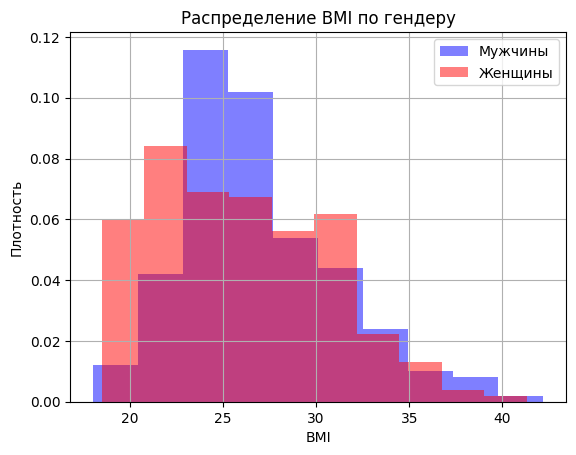

In [19]:

males = df[df['SEX'] == 'male']
females = df[df['SEX'] == 'female']

axes = males['BMI'].hist(bins=10, alpha=0.5, color='blue', label='Мужчины', density=True)
females['BMI'].hist(bins=10, alpha=0.5, color='red', label='Женщины', density=True)

plt.legend()
plt.xlabel('BMI')
plt.ylabel('Плотность')
plt.title('Распределение BMI по гендеру')
plt.show()

Глядя на получившиеся распределения, можно ли утверждать, что между ними есть эмпирические различия? Если да, то какие? Как бы это можно было бы проверить статистически?

Из полученных распределений можно заметить, что средний уровень индекса массы тела выше у мужчин в сравнении с женщинами. Чтобы подтвердить статистически значимые отличия средних можно использовать t.test() в случае нормального распределения данных или его непараметрический аналог в случае если данные не имеют нормального распределения, - тест Манна-Уитни.

In [77]:
#Попробуем применить t.test

from scipy import stats
t_stat, p_value = stats.ttest_ind(males['BMI'], females['BMI'], equal_var=False)
print(f"T-статистика: {t_stat}")
print(f"P-значение: {p_value}")

#Проверим данные на нормальность
shapiro_test = stats.shapiro(df['BMI'])
shapiro_test
#p-value < 0,05, отвергаем нулевую гипотезу о нормальности распределения

#Применим тест Манна-Уитни
mann_whitney_statistic, mann_whitney_p_value = stats.mannwhitneyu(males['BMI'], females['BMI'])
print(f"U-статистика: {mann_whitney_statistic}")
print(f"P-значение: {mann_whitney_p_value}")

#Полученное значени p-value < 0.05, значит есть статистически значимые отличия в BMI между мужчинами и женищнами.


T-статистика: 1.8662181072924342
P-значение: 0.06267725120660174
U-статистика: 27082.5
P-значение: 0.039465910197960315


[1] Теперь, используя библиотеку `Matplotlib`, постройте `scatterplot`, отображающий зависимость артериального давления от BMI. На нём выделите тех людей, чей уровень глюкозы превышает медиану по датасету (например, отдельным цветом точек и/или жирным контуром).

Не забудьте добавить:


Легенду  
Название графика  
Подписи осей  
Сетку (grid)




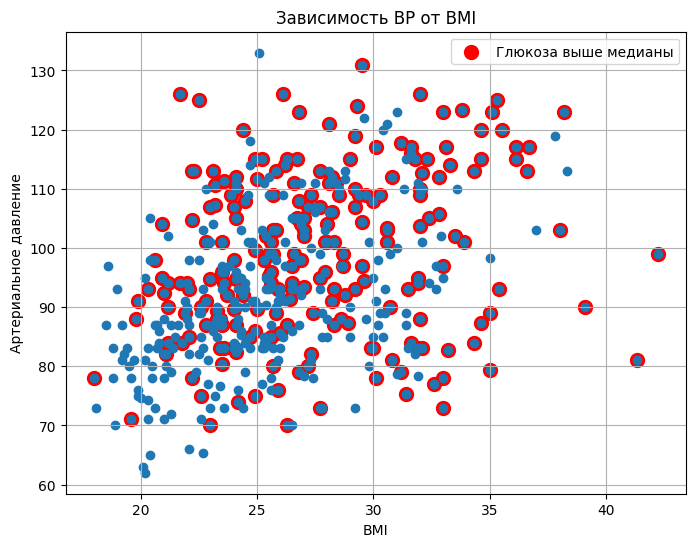

In [20]:
median_glu = df['glu'].median()

# Создаем фигуру и оси
fig, ax = plt.subplots(figsize=(8, 6))

# Создаем scatterplot с выделением точек по уровню глюкозы
ax.scatter(df['BMI'][df['glu'] > median_glu], df['BP'][df['glu'] > median_glu], c='red', s=100, label='Глюкоза выше медианы')
ax.scatter(df['BMI'],[df['BP']])

plt.legend()
plt.xlabel('BMI')
plt.ylabel('Артериальное давление')
plt.title('Зависимость BP от BMI')
plt.grid ( True )
plt.show()

In [45]:
df

,AGE,SEX,BMI,BP,tc,ldl,hdl,tch,ltg,glu,Y
0,59,male,32.1,101.00,157,93.2,38.0,4.00,4.8598,87,151
1,48,female,21.6,87.00,183,103.2,70.0,3.00,3.8918,69,75
2,72,male,30.5,93.00,156,93.6,41.0,4.00,4.6728,85,141
3,24,female,25.3,84.00,198,131.4,40.0,5.00,4.8903,89,206
4,50,female,23.0,101.00,192,125.4,52.0,4.00,4.2905,80,135
...,...,...,...,...,...,...,...,...,...,...,...
437,60,male,28.2,112.00,185,113.8,42.0,4.00,4.9836,93,178
438,47,male,24.9,75.00,225,166.0,42.0,5.00,4.4427,102,104
439,60,male,24.9,99.67,162,106.6,43.0,3.77,4.1271,95,132
440,36,female,30.0,95.00,201,125.2,42.0,4.79,5.1299,85,220


[1] Используя метод `plt.subplots` постройте гистограммы для всех 10-ти признаков из датасета (таргетную колонку `Y` включать не нужно):

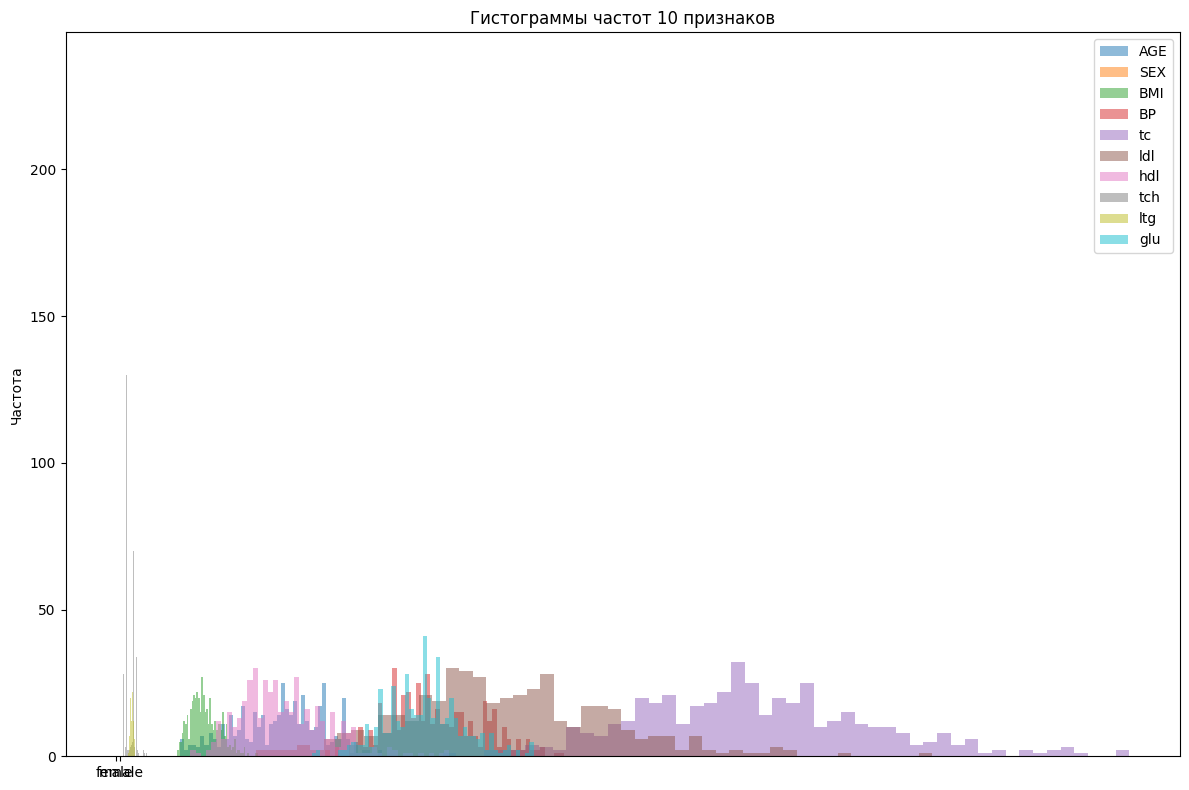

In [21]:
fig, ax = plt.subplots(figsize =(12,8))

features = df.columns[:-1] #Исключим последнюю колонку Y

for feature in features:
    ax.hist(df[feature], bins=50, alpha=0.5, label=feature)
    
ax.set_title('Гистограммы частот 10 признаков')
ax.set_ylabel('Частота')
ax.legend(loc='upper right')
plt.tight_layout()
plt.show()

Разбейте переменную `Age` на бины, например, с помощью `pd.cut`. Результатом должен стать новый категориальный признак (столбец в датафрейме), отражающий различные возрастные группы (например, 18-30, 31-40, 41-50, etc.). Убедитесь, что включили все возрасты (в новом столбце не должно быть NaN'ов).

In [22]:
bins = [ 18, 30, 40, 50, 60, 101]
labels = ['18-30', '31-40', '41-50', '51-60', '61+']

df['Age Group'] = pd.cut(df['AGE'], bins = bins, labels = labels, include_lowest=True)
df

,AGE,SEX,BMI,BP,tc,ldl,hdl,tch,ltg,glu,Y,Age Group
0,59,male,32.1,101.00,157,93.2,38.0,4.00,4.8598,87,151,51-60
1,48,female,21.6,87.00,183,103.2,70.0,3.00,3.8918,69,75,41-50
2,72,male,30.5,93.00,156,93.6,41.0,4.00,4.6728,85,141,61+
3,24,female,25.3,84.00,198,131.4,40.0,5.00,4.8903,89,206,18-30
4,50,female,23.0,101.00,192,125.4,52.0,4.00,4.2905,80,135,41-50
...,...,...,...,...,...,...,...,...,...,...,...,...
437,60,male,28.2,112.00,185,113.8,42.0,4.00,4.9836,93,178,51-60
438,47,male,24.9,75.00,225,166.0,42.0,5.00,4.4427,102,104,41-50
439,60,male,24.9,99.67,162,106.6,43.0,3.77,4.1271,95,132,51-60
440,36,female,30.0,95.00,201,125.2,42.0,4.79,5.1299,85,220,31-40


[1] Создайте `violinplot`, показывающее распределение уровня глюкозы для полученных выше возрастных групп.

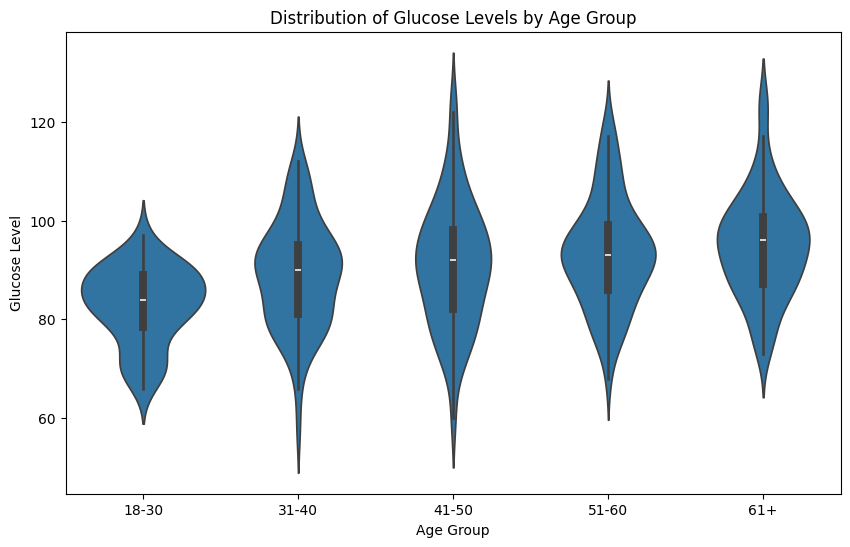

In [81]:
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.violinplot(x="Age Group", y="glu", data=df)


plt.title("Distribution of Glucose Levels by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Glucose Level")

# show the plot
plt.show()

Есть ли заметные отличия в полученных распределениях?  
Исходя из полученных графиков заметных отличий нет, однако уровень глюкозы в крови выше у более пожилых людей 

## [2] Блок 4. Матрица корреляций.
Заполните пропуски и получите изображение матрицы корреляции.

Для этого:

Посчитайте матрицу корреляций  
Создайте heatmap при помощи функции plt.imshow()  
Задайте отметки оси (ticks) и подписи к ним  
Добавьте значения корреляции в каждую ячейку  
Если не понимаете, каким примерно должен получиться итоговым результат, пролистайте ниже до ячейки с вызовом функции из seaborn.  

In [82]:
df

,AGE,SEX,BMI,BP,tc,ldl,hdl,tch,ltg,glu,Y,Age Group
0,59,male,32.1,101.00,157,93.2,38.0,4.00,4.8598,87,151,51-60
1,48,female,21.6,87.00,183,103.2,70.0,3.00,3.8918,69,75,41-50
2,72,male,30.5,93.00,156,93.6,41.0,4.00,4.6728,85,141,61+
3,24,female,25.3,84.00,198,131.4,40.0,5.00,4.8903,89,206,18-30
4,50,female,23.0,101.00,192,125.4,52.0,4.00,4.2905,80,135,41-50
...,...,...,...,...,...,...,...,...,...,...,...,...
437,60,male,28.2,112.00,185,113.8,42.0,4.00,4.9836,93,178,51-60
438,47,male,24.9,75.00,225,166.0,42.0,5.00,4.4427,102,104,41-50
439,60,male,24.9,99.67,162,106.6,43.0,3.77,4.1271,95,132,51-60
440,36,female,30.0,95.00,201,125.2,42.0,4.79,5.1299,85,220,31-40


In [37]:
data_types = df.dtypes
df.dtypes
numeric_cols = data_types[data_types != 'object'].index   

In [32]:
df.dtypes

AGE             int64
SEX            object
BMI           float64
BP            float64
tc              int64
ldl           float64
hdl           float64
tch           float64
ltg           float64
glu             int64
Y               int64
Age Group    category
dtype: object

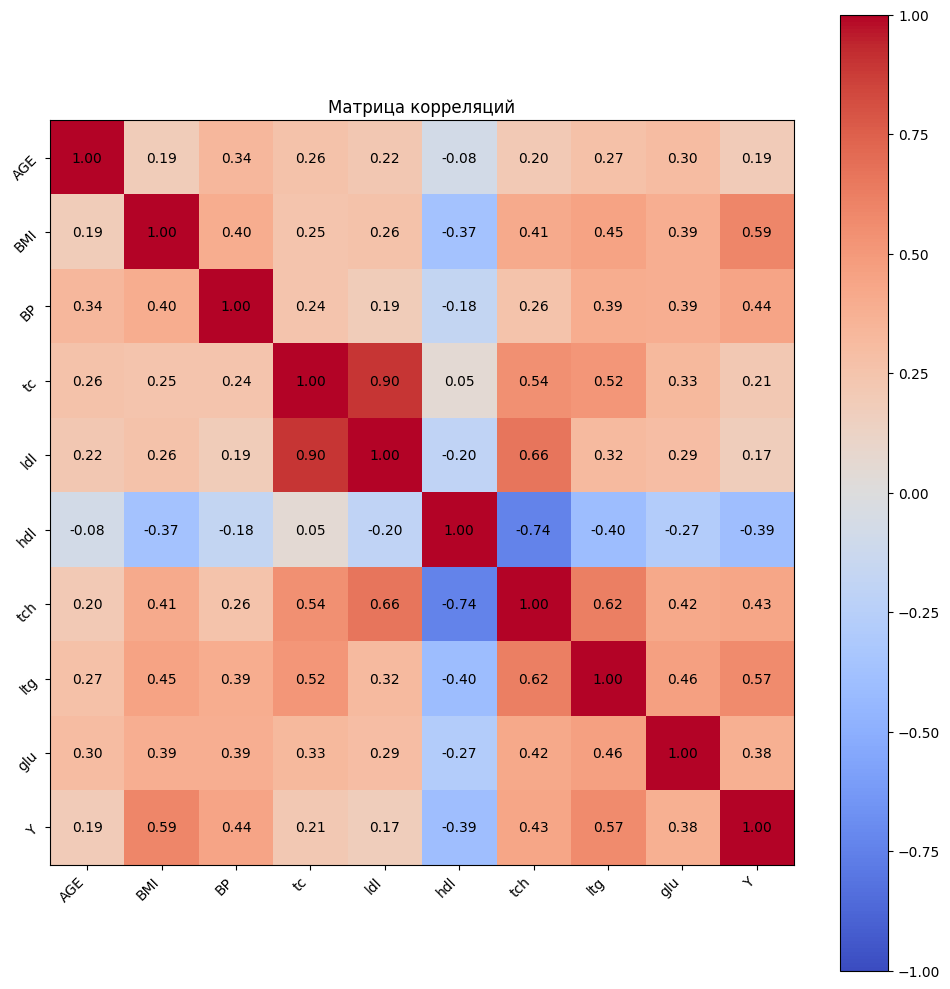

In [62]:
# Посчитайте матрицу корреляций

correlation_matrix = df[numeric_cols].iloc[:,:-1].corr()
correlation_matrix
# Создайте heatmap при помощи функции `plt.imshow()`
plt.figure(figsize =(10,10)) 
plt.imshow(correlation_matrix, cmap='coolwarm', vmin=-1, vmax=1) 
plt.colorbar()

# Задайте отметки оси (ticks) и подписи к ним
# Для создания отметок осей воспользуйтесь np.arange
# Отметок столько же, сколько столбцов в датасете
num_cols = len(correlation_matrix.columns)
ticks = np.arange(num_cols)
# Задайте подписи на оси x. Для этого воспользуйтесь полученными выше отметками
plt.xticks(ticks, correlation_matrix, rotation=45, ha='right') # Подписи повернем на 45 градусов для читаемости
# Аналогично для оси y
plt.yticks(ticks, correlation_matrix, rotation=45)

# Добавьте значения корреляции в каждую ячейку
# Для этого нужно проитерироваться по всем ячейкам матрицы, что можно сделать двумя циклами
for i in range(num_cols):
    for j in range(num_cols):
        # Текст внутри ячейки - значение из матрицы корреляции
        text = f"{correlation_matrix.iloc[i, j]:.2f}"
        # Вставьте позицию текста и сам текст
        plt.text(i, j, text,ha='center', va='center', color='black')

plt.title("Матрица корреляций")
plt.tight_layout() 
plt.show()

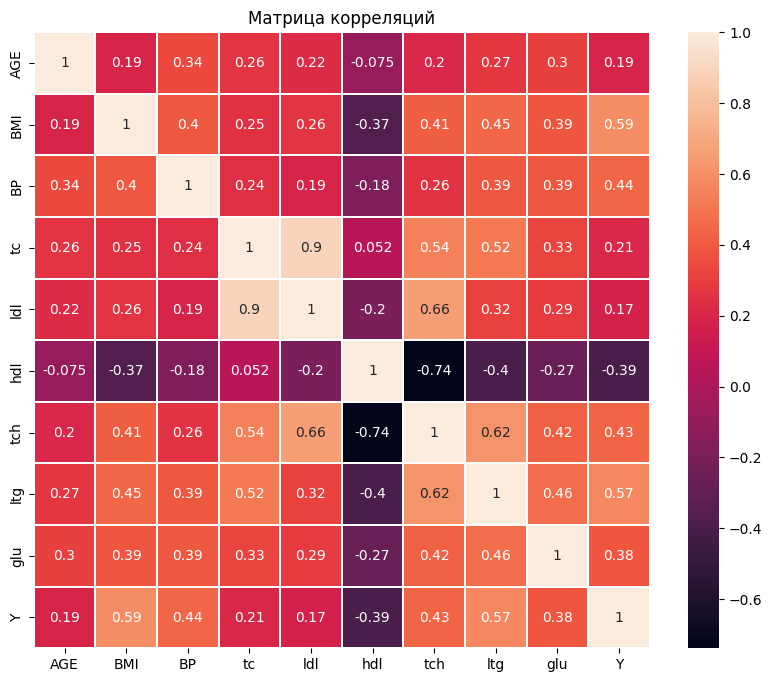

In [63]:
import seaborn as sns

plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, square=True, annot=True, linewidths=0.25)
plt.title("Матрица корреляций")
plt.show()

Определите, какие признаки имеют ощутимую корреляцию. Логично ли то, что вы наблюдаете, и почему?

Ваш ответ: Сильная корреляция наблюдается между общим уровнем холестерина в крови (tc) и уровнем липопротеинов низкой плотности(ldl). Также присутствует отрицательная корреляция между липопротеинами высокой плотности (hdl) и tc. Это логично, поскольку повышенный уровень холестерина в крови обычно связан с увеличенным содержанием именно ldl.